## Imports

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import itertools as it
import scipy.special as psi
plt.style.use('classic')
import seaborn as sns
import pandas as pd
from scipy.io import loadmat
from scipy import stats
from numpy.random import seed
from numpy.random import rand

from scipy.integrate import quad
from scipy.io import savemat
from tempfile import TemporaryFile
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from mpl_toolkits import mplot3d
from mPE_fn import mPE
from scipy.spatial import distance

## Load Data

In [3]:
# loading entire high-dimensional trajectory
x = loadmat('trajectory_normalized.mat')
trajectory = x['multi_D_traj_norm']
trajectory.shape

(540000, 60)

## Data Cleansing and Exploration

Text(0, 0.5, 'Frequency')

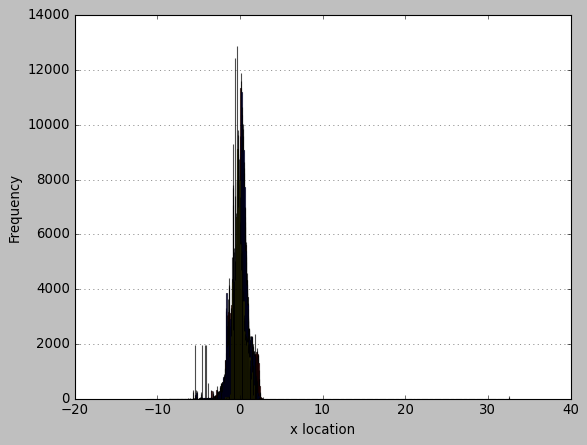

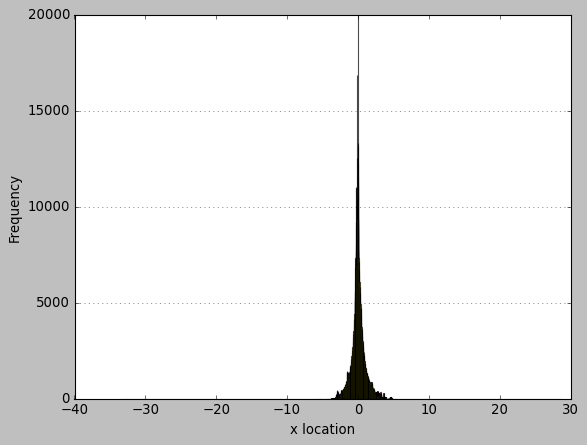

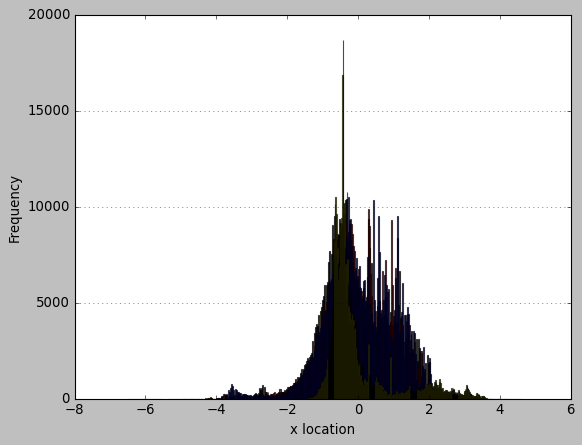

In [93]:
# removing invalid values (e.g. NaN)
# input data is already normalized (z-score) but needs to get rid of non-valued datapoints
nan_cols = []
for i in range(trajectory.shape[1]):
    if np.isnan(trajectory[:, i]).all():
        nan_cols.append(i)

trajectory = np.delete(trajectory, nan_cols, 1)
trajectory.shape

# plotting histogram of the x,y and z location of the first dimension of high-d trajectory
# x-location
fig = plt.figure(1)
n, bins, patches = plt.hist(x=trajectory[:, 0], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 3], bins='auto', color='red',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 6], bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 9], bins='auto', color='yellow',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('x location')
plt.ylabel('Frequency')


# y-location
fig = plt.figure(2)
n, bins, patches = plt.hist(x=trajectory[:, 1], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 4], bins='auto', color='red',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 7], bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 10], bins='auto', color='yellow',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('x location')
plt.ylabel('Frequency')

# z-location
fig = plt.figure(3)
n, bins, patches = plt.hist(x=trajectory[:, 2], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 5], bins='auto', color='red',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 8], bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=trajectory[:, 11], bins='auto', color='yellow',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('x location')
plt.ylabel('Frequency')

## Dimensionality Reduction: PCA

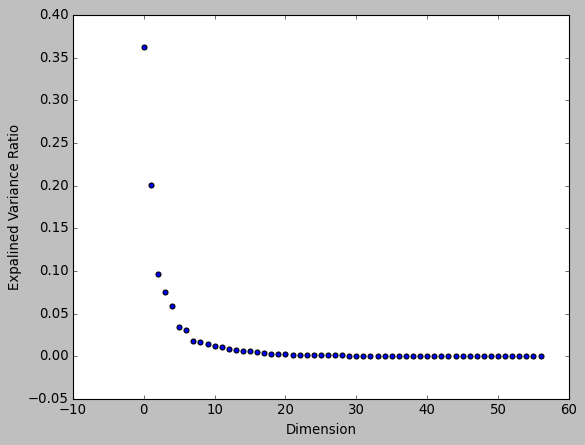

'print("Covariance matrix - Linear PCA")\nprint(np.cov(reduced_traj))\nprint("Covariance matrix - Kernel PCA")\nprint(np.cov(reduced_traj_2))'

In [11]:
# inspecting inter-dimensional variance with PCA
pca = PCA()
pca.fit(trajectory)

plt.scatter(np.arange(trajectory.shape[1]), pca.explained_variance_ratio_)
plt.ylabel('Expalined Variance Ratio')
plt.xlabel('Dimension')
plt.show()

# reduce data according to explained variance values using linear PCA
pca = PCA(n_components=3)
reduced_traj = pca.fit_transform(trajectory)
reduced_traj.shape

## Data Exploration

"# plotting histogram of the x-location of the first dimension for reduced trajectory (PCA)\nn, bins, patches = plt.hist(x=[:, 0], bins='auto', color='green',\n                            alpha=0.7, rwidth=0.85)\nplt.grid(axis='y', alpha=0.75)\nplt.xlabel('PC 1')\nplt.ylabel('Frequency')"

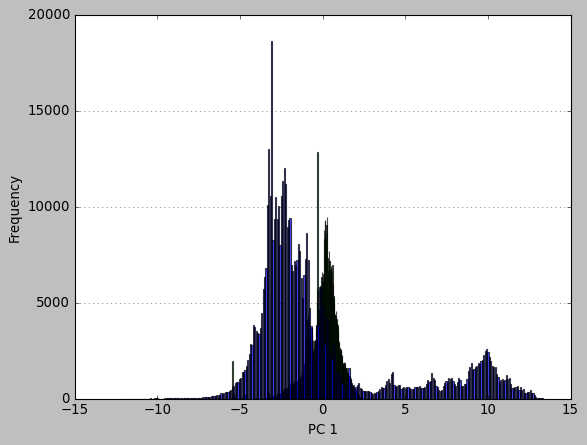

In [16]:
# plotting histogram of the x-location of the first dimension of non-reduced trajectory
n, bins, patches = plt.hist(x=trajectory[:, 0], bins='auto', color='green',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('x location')
plt.ylabel('Frequency')

# plotting histogram of the x-location of the first dimension for reduced trajectory (PCA)
n, bins, patches = plt.hist(x=reduced_traj[:, 0], bins='auto', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('PC 1')
plt.ylabel('Frequency')

"fig = plt.figure(3)\n# plotting 3D reduced trajectory (Kernel PCA)\nax = plt.axes(projection='3d')\nzdata = reduced_traj_2[0:traj_length, 2]\nxdata = reduced_traj_2[0:traj_length, 0]\nydata = reduced_traj_2[0:traj_length, 1]\nax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')"

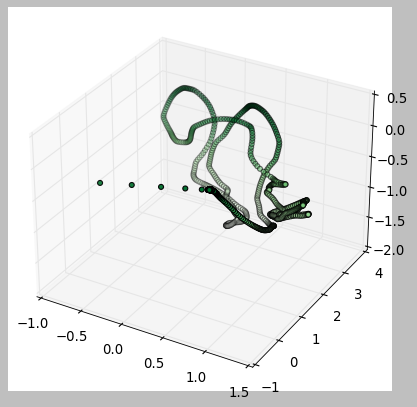

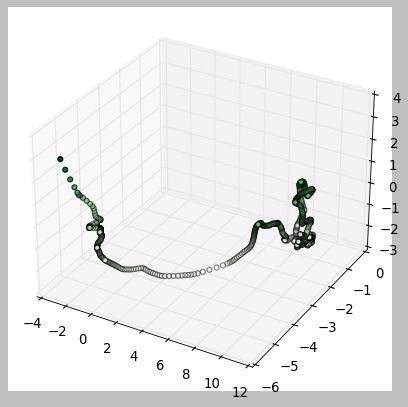

In [26]:
traj_length = 900

fig = plt.figure(1)
# plotting 3D trajectory taking first 3 dimensions of the high-d trajectory
ax = plt.axes(projection='3d')
zdata = trajectory[0:traj_length, 2]
xdata = trajectory[0:traj_length, 0]
ydata = trajectory[0:traj_length, 1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

fig = plt.figure(2)
# plotting 3D reduced trajectory (PCA)
ax = plt.axes(projection='3d')
zdata = reduced_traj[0:traj_length, 2]
xdata = reduced_traj[0:traj_length, 0]
ydata = reduced_traj[0:traj_length, 1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

## Entropy Analysis

### Helper functions

In [ ]:
def integrand(t, ni):
     return (t**(ni-1))/(1+t)

# Computes all the permutations of a range 0-k
def permutation(k):
  f_k=mt.factorial(k)
  A=np.empty((f_k,k))
  for i, perm in enumerate(it.permutations(range(k))):
      A[i,:] = perm
  return A

# Converts an array into a list
def array_list(array_num): 
    num_list = array_num.tolist()
    return num_list

# Creates an array that displays which permutation represent the order
# of the input array
def ubble(v):
    n=len(v)
    a=range(0,n)
    B=np.array([v,a])
    t=np.array([0., 0.])
    for i in range(0,n-1):
        for j in range(1,n):
            if B[0,j-1]>B[0,j]:
                
                t[:]=B[:,j]
                B[:,j]=B[:,j-1]
                B[:,j-1]=t[:]    
    ord=B[1][:]
    return ord

In [56]:
# [H,h]=mPE(data,n)
# returns the permutation entropy (of order n) and normalised 
# entropy vector of a time series "data"
    
# [H,h]=mPE(data,n,eps)
# returns the permutation entropy (of order n) and normalised 
# entropy vector of a time series "data". The vector eps contains
# as many elements as the number of scales considered by the algorithm.
# Each element of the vector eps represents how many elements are 
# considered in creating a coarse-grained time series. Default is eps=[1]
    
# [H,h]=mPE(data,n,eps,L)
# returns the permutation entropy (of order n) and normalised 
# entropy vector of a time series "data". The vector eps contains
# as many elements as the number of scales considered by the algorithm.
# Each element of the vector eps represents how many elements are 
# considered in creating a coarse-grained time series. Default is eps=[1]
# L is a lag parameter, default is 1.
# 
# n(order of the entropy)
# L(distance between two adjacent elements in the computation)(generally=1)

def mPE(*argv):
    
    g=len(argv)
    
    if g==2:
        n=argv[1]
        datain=argv[0]
        lamin=np.array([1])
        epsin=np.array([1])
    if g==3:
        n=argv[1]
        datain=argv[0]
        lamin=np.array([1])
        epsin=argv[2]
    if g==4:
        n=argv[1]
        datain=argv[0]
        lamin=argv[3]
        epsin=argv[2]
    
#    Check for the data to be in the right dimension
    if len(datain[:,1])>len(datain[1,:]):
        datain=datain.transpose()
        
    
    scalesno=len(epsin)
    lagno=len(lamin)
    HH=np.zeros((lagno,scalesno))
    norm_HH=np.zeros((lagno,scalesno))
#    Definition of parameters: fac is the number of possible permutations
#    Elem is the No of data points
#    Dim is the dimensionality of the samples
    
    for lam in range(0,lagno):
        for eps in range(0,scalesno):
            scale=epsin[eps]
            L=lamin[lam]
            xlen=len(datain[1,:])
            ylen=np.round((xlen/scale)-0.5)
            ylen=ylen.astype(int)
            D=np.zeros((len(datain[:,1]),ylen))
            for ylenc in range(0,ylen):
                dfg=datain[:,((ylenc)*scale):((ylenc+1)*scale)]
                fhk=np.sum(dfg,axis=1)
                r=(1/scale)*fhk
                D[:,ylenc]=r
                
            data=D
            fac=mt.factorial(n)
            elem=len(data[1,:])
            dim=len(data[:,1])
            
        #    A is a n-by-factorial(n) matrix that shows all the 
        #    possible permutations of n elements
            A=permutation(n)
            
        #    counter is a factorial(n) square matrix that counts the recurrence of
        #    a dim-dimensional permutation
            lpi=fac*np.ones((dim))
            lpi=lpi.astype(int)
            nj = lpi.tolist()
            counter=np.zeros((nj))
            
        #    For each iteration i, a series of n points is sampled from the 
        #    data set and the corresponding permutation is identified. 
        #    The counter matrix keeps track of the numiber of times a certain
        #    permutation, or combination of permutations is observed. 
            for i in range(0, elem-n*L+L-1):
                coord=np.zeros((dim))
                for num in range(0,dim):
                    sample=data[num,range(i,i+L*(n),L)]
                    ord=ubble(sample)
                    perm_num=0
                    check_1=1
                    check_2=1
                    
                    while (perm_num<=fac) and (check_2):
                       
                        check_1=1
                        for j in range(0,n-1):
                            if ord[j]!=A[perm_num,j]:
                                check_1=0
                        if check_1:
                            coord[num]=perm_num
                            check_2=0
                            
                        perm_num=perm_num+1
                
                    
                coord=coord.astype(int)
                coord1=tuple(coord)
                counter[coord1]=counter[coord1]+1
                
        #    Once the counter matrix is complete, each element is divided by the
        #    total number of samples to get a empirical probability, and the PE is
        #    computed according to the method described in Schurmann
            
            H=0
            counter1=counter.flatten()
            for iter in range(0,(fac**dim)):
               
                rec=counter1[iter]
                tot=elem-n+1
                
                if rec==0:
                    H=H
                    
                else:
                    I = quad(integrand, 0, 1, args=(rec))
                    I=I[0]
                    coeff=((-1)**rec)*I
                    prob=(rec/tot)*(psi.digamma(tot)-psi.digamma(rec)-coeff)
                    H=H+mt.log2(mt.exp(prob))
                 
        #     The normalised entropy norm_H is computed as well
            norm_H=H/(mt.log2(fac**dim))
            
            HH[lam,eps]=H
            norm_HH[lam,eps]=norm_H
    return [HH,norm_HH]

In [90]:
# Entropy Calculation:
# - Divide entire trajetcory in 'bins_number' bins
# - Divide each bin for 'traj_number' trajectories
# - Calculate mPE for each of these trajectories 
# - Calculate instantaneous velocity of each datapoint (maybe only consider x-y dims)
bins_number = 30
traj_number = 30
traj_length = int((reduced_traj.shape[0]/bins_number)/traj_number)
# orders = [3, 4, 5, 6]
orders = [3]
f_s = 300
delta_t = 1/f_s
lest_varaince_dim = 8*3

mPE_vector = np.zeros((bins_number, traj_number, len(orders)))
vel_vector = np.zeros((reduced_traj.shape[0], 1))

# velocity calculation
last_point = trajectory[1, lest_varaince_dim:lest_varaince_dim+3]
for idx, point in enumerate(trajectory[:, lest_varaince_dim:lest_varaince_dim+3]):
    print(idx)
    vel = np.linalg.norm((abs(point) - abs(last_point)))
    vel_vector[idx] = vel
    last_point = point

# entropy calculation
for a, order in enumerate(orders):
    print(a)
    for i in range(bins_number):
        print(i)
        idx = 0
        idx_1 = 0
        for j in range(0, traj_length*traj_number, traj_length):
            idx_1 = i*bins_number*traj_length 
            traj = reduced_traj[idx_1 + j: idx_1 + j + traj_length]
            [HH,hh_norm]=mPE(traj,order)
            mPE_vector[i, idx , a] = HH
            idx += 1


54
537155
537156
537157
537158
537159
537160
537161
537162
537163
537164
537165
537166
537167
537168
537169
537170
537171
537172
537173
537174
537175
537176
537177
537178
537179
537180
537181
537182
537183
537184
537185
537186
537187
537188
537189
537190
537191
537192
537193
537194
537195
537196
537197
537198
537199
537200
537201
537202
537203
537204
537205
537206
537207
537208
537209
537210
537211
537212
537213
537214
537215
537216
537217
537218
537219
537220
537221
537222
537223
537224
537225
537226
537227
537228
537229
537230
537231
537232
537233
537234
537235
537236
537237
537238
537239
537240
537241
537242
537243
537244
537245
537246
537247
537248
537249
537250
537251
537252
537253
537254
537255
537256
537257
537258
537259
537260
537261
537262
537263
537264
537265
537266
537267
537268
537269
537270
537271
537272
537273
537274
537275
537276
537277
537278
537279
537280
537281
537282
537283
537284
537285
537286
537287
537288
537289
537290
537291
537292
537293
537294
537295
537296
537

[4.57755977 4.23737469 3.85154951 3.70776112 3.71171181 3.7892131
 4.17766272 4.35001582 4.28857492 4.06848427 4.33438346 3.90751027
 3.96599021 4.44936967 4.07251737 3.70840738 3.84025802 3.4732473
 3.89187599 3.85324966 4.38930448 4.29322501 4.29627607 4.49562968
 3.96917756 4.08855213 4.03521814 4.23017568 4.23801838 4.23499601]


Text(0, 0.5, 'relative velocity')

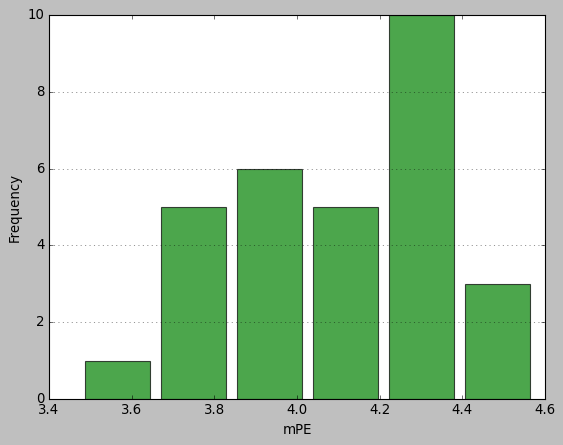

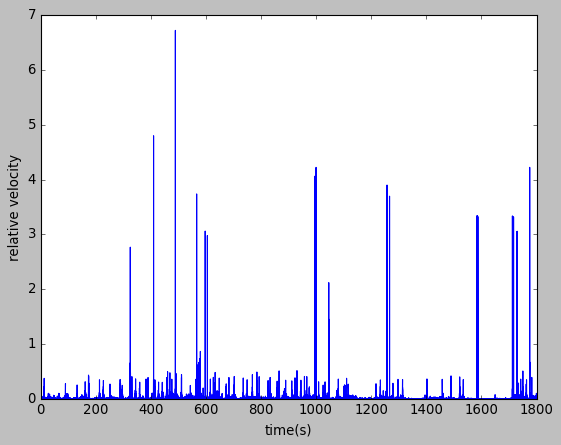

In [96]:
bin_number = 1
order_number = 0

# entropy distribution visualization
# plotting mpE of the first bin 
fig = plt.figure(1)
n, bins, patches = plt.hist(x= mPE_vector[bin_number, :, 0] , bins='auto', color='green',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mPE')
plt.ylabel('Frequency')

print(mPE_vector[bin_number, :, 0])

fig = plt.figure(2)
# plotting velocity profile of mouse (point-wise)
plt.plot(1/300*np.arange(len(vel_vector)), vel_vector)
plt.xlabel('time(s)')
plt.ylabel('relative velocity')

# plotting J-S divergence as a function of bin number
#for bin in range(mPE_vector.shape[0])


In [128]:
def prob_vector(raw_data, decimals=1):
    rounded_data = [(round(x * 10**(decimals)))/(10**decimals) for x in raw_data]
    sorted_data = np.sort(rounded_data)

    already_seen = []
    prob_vector = []
    occurences = 0
    sorted_data = np.array(sorted_data, dtype=np.float64)
    print(type(sorted_data))
    for datapoint in sorted_data:
        if datapoint not in already_seen:
            print(type(datapoint))
            occurrences = np.count_nonzero(sorted_data == datapoint)
            print(occurences)
            already_seen.append(datapoint)
            prob_vector.append(occurences/len(sorted_data))
    
    print(sum(prob_vector))
    return prob_vector

In [129]:
prob_vector = prob_vector(mPE_vector[bin_number, :, 0])
print(prob_vector)

<class 'list'>
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
<class 'float'>
0
0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# reducing trajectory space using Kernel PCA ('poly')
'''transformer = KernelPCA(n_components=3, kernel='poly')
reduced_traj_2 = transformer.fit_transform(trajectory)
reduced_traj_2.shape'''

# Covaraince matrixe for Linear PCA and Kernel-PCA reduced trajectories
'''print("Covariance matrix - Linear PCA")
print(np.cov(reduced_traj))
print("Covariance matrix - Kernel PCA")
print(np.cov(reduced_traj_2))'''

# plotting 3D reduced trajectory (Kernel - PCA)
'''fig = plt.figure(3)
# plotting 3D reduced trajectory (Kernel PCA)
ax = plt.axes(projection='3d')
zdata = reduced_traj_2[0:traj_length, 2]
xdata = reduced_traj_2[0:traj_length, 0]
ydata = reduced_traj_2[0:traj_length, 1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')'''

In [ ]:
("JDM25baseline_Ext4_timematched_controltsne_analysis_struct_mocapdata.mat" "JDM25baseline_Ext4_timematched_controltsne_analysis_struct.mat" "JDM25baseline_Ext7_truevehicletsne_analysis_struct_mocapdata.mat" "JDM25baseline_Ext7_truevehicletsne_analysis_struct.mat" "JDM32baseline_Ext4_timematched_controltsne_analysis_struct_mocapdata.mat" "JDM32baseline_Ext4_timematched_controltsne_analysis_struct.mat" "JDM32baseline_Ext8_timematched_controltsne_analysis_struct_mocapdata.mat" "JDM32baseline_Ext8_timematched_controltsne_analysis_struct.mat" "JDM33baseline_Ext5_timematched_controltsne_analysis_struct_mocapdata.mat" "JDM33baseline_Ext5_timematched_controltsne_analysis_struct.mat" "JDM33baseline_Ext7_timematched_controltsne_analysis_struct_mocapdata.mat" "JDM33baseline_Ext7_timematched_controltsne_analysis_struct.mat" "tsne_analysis_struct_JDM25_amphonly_mocapdata.mat" "tsne_analysis_struct_JDM25_amphonly.mat" "tsne_analysis_struct_JDM25_Caffonly_mocapdata.mat" "tsne_analysis_struct_JDM25_Caffonly.mat" "tsne_analysis_struct_JDM32_amphonly_mocapdata.mat" "tsne_analysis_struct_JDM32_amphonly.mat" "tsne_analysis_struct_JDM32_Caffonly_mocapdata.mat" "tsne_analysis_struct_JDM32_Caffonly.mat" "tsne_analysis_struct_JDM33_amphonly_mocapdata.mat" "tsne_analysis_struct_JDM33_amphonly.mat" "tsne_analysis_struct_JDM33_Caffonly_mocapdata.mat" "tsne_analysis_struct_JDM33_Caffonly.mat"
"tsne_analysis_struct_Vicon8_amphonly_mocapdata.mat" "tsne_analysis_struct_Vicon8_amphonly.mat" "tsne_analysis_struct_Vicon8_Caffonly_mocapdata.mat"
"tsne_analysis_struct_Vicon8_Caffonly.mat" "Vicon8baseline_Ext4_timematched_controltsne_analysis_struct_mocapdata.mat"
"Vicon8baseline_Ext4_timematched_controltsne_analysis_struct.mat" "Vicon8baseline_Ext5_truevehicletsne_analysis_struct_mocapdata.mat" "Vicon8baseline_Ext5_truevehicletsne_analysis_struct.mat")